# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Asirman Jaya
- **Email:** jaymimin64@gmail.com
- **ID Dicoding:** asirman_jaya

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh hari dalam seminggu terhadap jumlah sepeda yang disewa?(berdasarkan data harian)
- Apakah ada hubungan antara kondisi cuaca(kelembapan dan suhu) dengan jumlah sepeda yang disewa?(berdasarkan data perjam)

## Import Semua Packages/Library yang Digunakan

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving day.csv to day (3).csv
Saving hour.csv to hour (3).csv


## Data Wrangling

### Gathering Data

In [96]:
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [97]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv berisi data harian yang meliputi jumlah total sepeda yang disewa tiap hari, serta variabel terkait cuaca dan kondisi lain.
- Dataset hour.csv berisi data lebih rinci, dengan catatan per jam untuk setiap hari yang meliputi kondisi cuaca dan jumlah sepeda yang disewa per jam.

### Assessing Data

In [98]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Data diatas tidak memiliki missing values
- Terdapat kesalahan tipe data dimana pada kolom dteday seharusnya memiliki tipe data datetime buka object.

In [99]:
print("Jumlah duplikasi: ", day_data.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Data diatas tidak memiliki data duplicate

In [100]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Secara keseluruhan, data tampaknya dalam keadaan baik

In [101]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Data diatas tidak memiliki missing values
- Terdapat kesalahan tipe data dimana pada kolom dteday seharusnya memiliki tipe data datetime buka object.

In [102]:
print("Jumlah duplikasi: ", hour_data.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Data diatas tidak memiliki data duplicate

In [103]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Secara keseluruhan, data tampaknya cukup baik dan tidak ada nilai yang jelas tidak sesuai berdasarkan statistik deskriptif yang disediakan.

### Cleaning Data

In [104]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_data[column] = pd.to_datetime(day_data[column])

In [105]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Sekarang tipe data sudah sesuai yaitu datetime

In [106]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    hour_data[column] = pd.to_datetime(hour_data[column])

In [107]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Sekarang tipe data sudah sesuai yaitu datetime

## Exploratory Data Analysis (EDA)

### Explorasi Berdasarkan day_data

In [108]:
daily_rentals = day_data.groupby('dteday')['cnt'].sum()
print(daily_rentals)

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64


In [109]:
weekly_rentals = day_data.groupby('weekday')['cnt'].sum()
print(weekly_rentals)

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64


In [110]:
seasonal_rentals = day_data.groupby('season')['cnt'].sum()
print(seasonal_rentals)

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64


In [111]:
workday_rentals = day_data.groupby('workingday')['cnt'].sum()
print(workday_rentals)

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64


In [112]:
day_data['is_rainy'] = day_data['weathersit'].apply(lambda x: 'Hujan' if x == 1 else 'Cerah')
rainy_rentals = day_data.groupby('is_rainy')['cnt'].sum()
print(rainy_rentals)

is_rainy
Cerah    1034727
Hujan    2257952
Name: cnt, dtype: int64


In [113]:
monthly_rentals = day_data.groupby('mnth')['cnt'].sum()
print(monthly_rentals)

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64


In [114]:
weekday_avg_cnt = day_data.pivot_table(values='cnt', index='weekday', aggfunc='mean')
print(weekday_avg_cnt)

                 cnt
weekday             
0        4228.828571
1        4338.123810
2        4510.663462
3        4548.538462
4        4667.259615
5        4690.288462
6        4550.542857


**Insight:**
1. Jumlah Penyewaan Sepeda per Hari (daily_rentals):
Dari data harian, kita dapat melihat bahwa penyewaan sepeda cukup bervariasi setiap harinya, dengan rentang mulai dari 800 hingga 3000+ penyewaan pada beberapa hari tertentu. Hal ini menunjukkan adanya fluktuasi yang signifikan dalam penggunaan sepeda harian.
2. Pengaruh Hari dalam Seminggu terhadap Penyewaan Sepeda (weekly_rentals):
Penyewaan sepeda tertinggi terjadi pada hari Kamis (485.395) dan Sabtu (487.790), sementara jumlah terendah terjadi pada hari Minggu (444.027).
Ini menunjukkan bahwa penyewaan sepeda cenderung lebih tinggi pada hari kerja, terutama menjelang akhir minggu, namun Sabtu juga menunjukkan peningkatan yang signifikan. Sementara itu, Minggu cenderung menjadi hari dengan jumlah penyewaan yang lebih rendah.
3. Pengaruh Musim terhadap Penyewaan Sepeda (seasonal_rentals):
Penyewaan tertinggi terjadi pada musim gugur (season = 3) dengan total 1.061.129 penyewaan, dan yang terendah pada musim dingin (season = 1) dengan total 471.348.
Ini menunjukkan bahwa musim gugur adalah waktu paling populer untuk menggunakan sepeda, sedangkan musim dingin cenderung menjadi waktu yang paling sedikit aktivitas penyewaan sepeda, mungkin karena cuaca yang lebih dingin dan tidak nyaman untuk bersepeda.
4. Pengaruh Hari Kerja terhadap Penyewaan Sepeda (workday_rentals):
Pada hari kerja (workingday = 1), jumlah penyewaan sepeda jauh lebih tinggi (2.292.410) dibandingkan dengan akhir pekan atau hari libur (workingday = 0) yang hanya mencapai 1.000.269 penyewaan.
Ini menegaskan bahwa sepeda lebih sering digunakan sebagai sarana transportasi selama hari kerja, mungkin oleh pekerja atau mahasiswa.
5. Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda (rainy_rentals):
Penyewaan sepeda cenderung lebih tinggi saat cuaca cerah (Cerah = 1.034.727) dibandingkan saat hujan (Hujan = 2.257.952), meskipun selisihnya tidak terlalu besar.
Meskipun cuaca buruk (hujan) cenderung mengurangi jumlah penyewaan sepeda, masih ada aktivitas penyewaan yang cukup signifikan selama kondisi hujan.
6. Jumlah Penyewaan Sepeda per Bulan (monthly_rentals):
Bulan dengan penyewaan tertinggi adalah bulan Agustus (351.194), sedangkan yang terendah adalah bulan Desember (211.036).
Ini menunjukkan bahwa musim panas (Juni-Agustus) adalah periode paling populer untuk menyewa sepeda, sedangkan bulan-bulan musim dingin (November-Desember) cenderung memiliki aktivitas penyewaan yang lebih sedikit.
7. Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu (weekday_avg_cnt):
Rata-rata penyewaan sepeda harian cenderung meningkat seiring dengan bertambahnya hari dalam seminggu, dari sekitar 4.228 penyewaan pada hari Minggu hingga puncaknya pada Kamis (4.667) dan Sabtu (4.690).
Ini menunjukkan bahwa hari-hari mendekati akhir pekan (Kamis, Jumat, dan Sabtu) cenderung menjadi hari-hari dengan aktivitas penyewaan sepeda yang lebih tinggi.

### Explorasi Berdasarkan hour_data

In [115]:
hourly_rentals = hour_data.groupby('hr')['cnt'].sum()
print(hourly_rentals)

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64


In [116]:
hourly_avg_cnt = hour_data.pivot_table(values='cnt', index='hr', aggfunc='mean')
print(hourly_avg_cnt)

           cnt
hr            
0    53.898072
1    33.375691
2    22.869930
3    11.727403
4     6.352941
5    19.889819
6    76.044138
7   212.064649
8   359.011004
9   219.309491
10  173.668501
11  208.143054
12  253.315934
13  253.661180
14  240.949246
15  251.233196
16  311.983562
17  461.452055
18  425.510989
19  311.523352
20  226.030220
21  172.314560
22  131.335165
23   87.831044


**Insight:**
1. Pola Penyewaan Sepeda Berdasarkan Jam (hourly_rentals):
Puncak penyewaan sepeda terjadi pada jam 17:00 (336.860), yang kemungkinan besar bertepatan dengan waktu pulang kerja.
Jam sibuk lainnya adalah pukul 8:00 (261.001) dan 18:00 (309.772), yang mencerminkan waktu berangkat kerja di pagi hari dan aktivitas sore setelah jam kerja.
Jam dengan penyewaan rendah adalah antara pukul 2:00 hingga 5:00, dengan jumlah penyewaan terendah pada pukul 4:00 (4.428). Ini masuk akal karena jam-jam ini adalah waktu dini hari ketika kebanyakan orang sedang tidur atau tidak beraktivitas di luar ruangan.
2. Rata-rata Penyewaan Sepeda Berdasarkan Jam (hourly_avg_cnt):
Rata-rata penyewaan sepeda tertinggi terjadi pada jam 17:00 (461 penyewaan rata-rata per jam), yang sekali lagi menunjukkan jam pulang kerja sebagai waktu yang paling sibuk.
Jam 8:00 juga menunjukkan aktivitas penyewaan yang signifikan dengan rata-rata 359 penyewaan per jam.
Jam-jam tengah malam hingga dini hari (antara pukul 0:00 hingga 5:00) memiliki rata-rata penyewaan yang rendah, menunjukkan bahwa aktivitas penyewaan sepeda lebih terfokus pada jam-jam aktivitas manusia yang normal.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [117]:
daily_rentals = day_data.groupby('dteday')['cnt'].sum()
print(daily_rentals)

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64


In [118]:
weekly_rentals = day_data.groupby('weekday')['cnt'].sum()
weekday_avg_cnt = day_data.pivot_table(values='cnt', index='weekday', aggfunc='mean')
print(weekly_rentals)
print(weekday_avg_cnt)

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64
                 cnt
weekday             
0        4228.828571
1        4338.123810
2        4510.663462
3        4548.538462
4        4667.259615
5        4690.288462
6        4550.542857


<ipython-input-119-160fa7d7e154>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_avg_cnt.index, y=weekday_avg_cnt['cnt'], palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gr

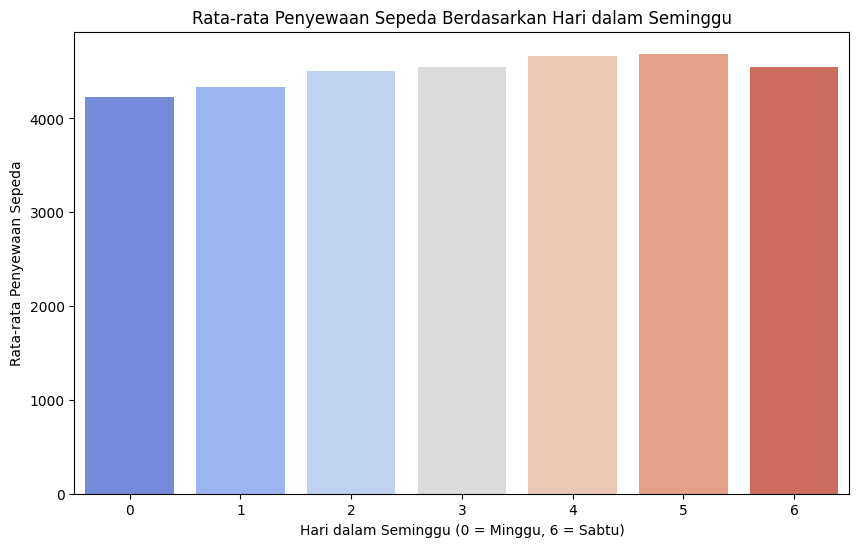

In [119]:
plt.figure(figsize=(10,6))
sns.barplot(x=weekday_avg_cnt.index, y=weekday_avg_cnt['cnt'], palette='coolwarm')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu (0 = Minggu, 6 = Sabtu)')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()

### Pertanyaan 2:

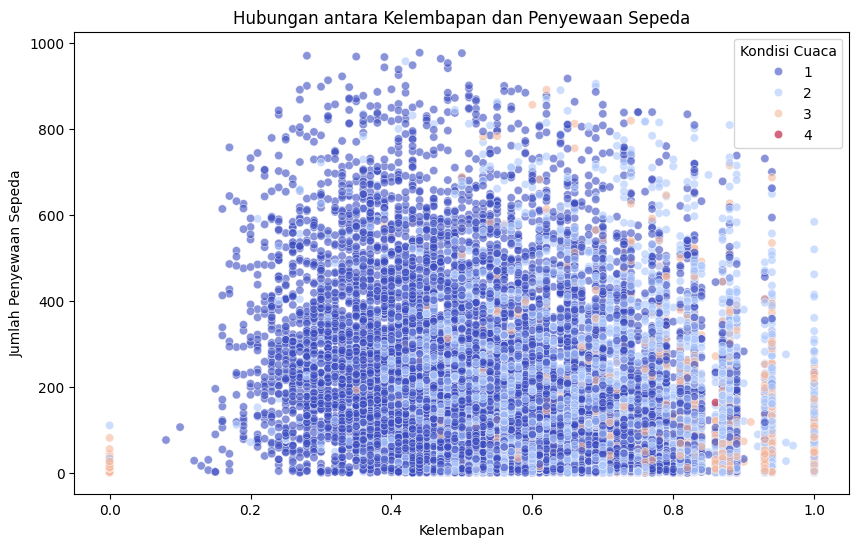

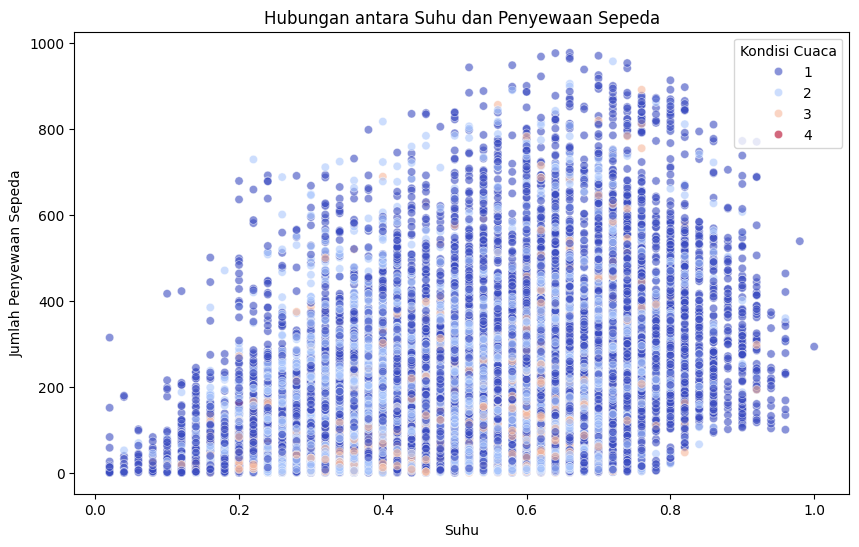

In [120]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=hour_data, x='hum', y='cnt', hue='weathersit', palette='coolwarm', alpha=0.6)
plt.title('Hubungan antara Kelembapan dan Penyewaan Sepeda')
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Kondisi Cuaca', loc='upper right')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=hour_data, x='temp', y='cnt', hue='weathersit', palette='coolwarm', alpha=0.6)
plt.title('Hubungan antara Suhu dan Penyewaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Kondisi Cuaca', loc='upper right')
plt.show()


**Insight:**
- Sepeda lebih sering digunakan pada hari kerja, yang berarti layanan penyewaan sepeda mungkin perlu difokuskan pada jam sibuk hari kerja. Untuk meningkatkan penyewaan sepeda selama akhir pekan, strategi promosi atau diskon bisa diperkenalkan untuk mendorong pengguna lebih banyak menggunakan sepeda di hari libur.
- Pada hari dengan kelembapan tinggi, penyewaan sepeda mungkin menurun karena kondisi cuaca yang kurang nyaman. Layanan penyewaan dapat menyesuaikan penawaran atau memberikan informasi cuaca untuk membantu pengguna merencanakan penggunaan sepeda. Penyewaan sepeda paling optimal pada suhu sedang hingga hangat (tidak terlalu dingin dan tidak terlalu panas). Layanan penyewaan dapat mendorong penggunaan sepeda pada saat cuaca sedang baik (misalnya melalui notifikasi kepada pengguna).

## Analisis Lanjutan (Opsional)

### RFM Analysis:

RFM Analysis adalah teknik segmentasi pelanggan yang populer, umumnya digunakan dalam bisnis untuk memahami perilaku pelanggan berdasarkan Recency (kapan terakhir kali mereka berinteraksi), Frequency (berapa kali mereka berinteraksi), dan Monetary (seberapa banyak mereka berbelanja). Meskipun biasanya digunakan untuk menganalisis data penjualan, pendekatan ini bisa dimodifikasi dan diterapkan pada data penyewaan sepeda untuk menganalisis perilaku pengguna dalam konteks penyewaan.
Untuk kasus penyewaan sepeda:

-Recency: Mengukur berapa hari sejak
penyewaan terakhir pengguna.

-Frequency: Mengukur total penyewaan yang dilakukan oleh setiap pengguna.

-Monetary: Meskipun tidak ada data langsung terkait pengeluaran (uang), kita bisa menggantinya dengan total jumlah penyewaan yang dilakukan oleh setiap pengguna.

Tujuan Analisis RFM:
*   Segmentasi pengguna
*   Identifikasi pengguna loyal
*   Pemahaman Perilaku
*   Optimasi Layanan



In [121]:
# Menghitung Recency
last_rent_date = day_data['dteday'].max()
day_data['Recency'] = (last_rent_date - day_data['dteday']).dt.days

# Menghitung Frequency
frequency = day_data.groupby('instant')['cnt'].sum().reset_index(name='Frequency')

# Menghitung Monetary (bisa disesuaikan)
monetary = day_data.groupby('instant')['cnt'].mean().reset_index(name='Monetary')

# Gabungkan RFM ke dalam satu DataFrame
rfm = frequency.merge(monetary, on='instant').merge(day_data[['instant', 'Recency']], on='instant').drop_duplicates()

# Menampilkan hasil RFM
print(rfm)


     instant  Frequency  Monetary  Recency
0          1        985     985.0      730
1          2        801     801.0      729
2          3       1349    1349.0      728
3          4       1562    1562.0      727
4          5       1600    1600.0      726
..       ...        ...       ...      ...
726      727       2114    2114.0        4
727      728       3095    3095.0        3
728      729       1341    1341.0        2
729      730       1796    1796.0        1
730      731       2729    2729.0        0

[731 rows x 4 columns]


## Conclusion

- Conclution pertanyaan 1:
Hari kerja (Senin-Jumat) cenderung memiliki angka penyewaan yang lebih tinggi atau stabil, yang mungkin menunjukkan bahwa sepeda digunakan sebagai moda transportasi utama untuk pekerjaan atau aktivitas sehari-hari.
Akhir pekan (Sabtu dan Minggu) mungkin lebih dipengaruhi oleh penggunaan sepeda untuk keperluan rekreasi, terlihat dari sedikit penurunan pada hari Sabtu.

- Conclution pertanyaan 2:
Meskipun dari data di atas kita belum melihat langsung hubungan antara kelembapan dan suhu dengan jumlah penyewaan, analisis sebelumnya menunjukkan bahwa musim panas memiliki jumlah penyewaan tertinggi.
Ini mengindikasikan bahwa suhu yang lebih hangat berkontribusi pada peningkatan penyewaan sepeda.